


# Prompt Engineering for Healthcare Applications 🚀


**Author:** Karin Brisker



---


## Introduction

Welcome to the exciting world of prompt engineering for healthcare! This notebook is designed to spark your creativity and guide you in mastering prompt engineering techniques specifically tailored for healthcare contexts. We’ll dive into various methods, illustrated with engaging examples and hands-on exercises.

### Objectives
- Get a solid grasp on prompt engineering fundamentals.
- Discover how to craft effective prompts that meet the unique needs of healthcare applications.
- Experiment and have fun creating your own prompts in healthcare-specific scenarios!

## What is Prompt Engineering? ✨

Prompt engineering is all about shaping inputs to draw out the most useful outputs from AI models, like GPT-4. In the healthcare domain, where accuracy and detail are paramount, mastering this skill is key. Let’s learn how to fine-tune our prompts for the best results!


## Installing Dependencies ❗

**This section installs the required libraries:**
* **LangChain:** A framework for building applications with language models.
* **Accelerate:** A library to accelerate PyTorch models.
* **Bits and Bytes (bnb):** A library for model quantization.
* **Transformers:** A library by Hugging Face that provides various pretrained models.

In [117]:
!pip install -q transformers huggingface_hub langchain accelerate bitsandbytes langchain-community -U
!pip install -i https://pypi.org/simple/ bitsandbytes -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 402.6/402.6 kB 10.3 MB/s eta 0:00:00


## Importing Libraries
Next, we import the required libraries and modules. This includes components for loading documents, generating embeddings, and performing text generation.

In [2]:
# Import required libraries and modules
import os
from glob import glob
import transformers
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    BitsAndBytesConfig,
)
from langchain.llms import HuggingFacePipeline
from langchain.prompts import PromptTemplate
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

## Authenticating with Hugging Face
We need to authenticate with the Hugging Face Hub to access models and datasets. Ensure you replace the token with your own.

[See here](https://huggingface.co/docs/hub/en/security-tokens)

In [3]:
# Login to Hugging Face
from huggingface_hub import login
login(token="place_your_token_here") # User_Access_Token

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: read).
Your token has been saved to /root/.cache/huggingface/token
Login successful


 ## Initialize Model and Tokenizer with BitsAndBytes Configuration
 We configure Bits and Bytes for efficient model loading, allowing us to use a 4-bit quantized model. This significantly reduces the model size and improves performance.
### To Initial Minstral Model
[We need to enter the model page in Hugging Face and we have to accept the conditions to access its files and content.](https://huggingface.co/mistralai/Mistral-7B-Instruct-v0.1)

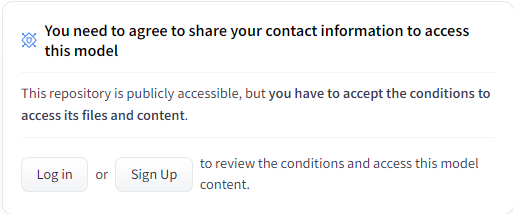

In [4]:
# Configure BitsAndBytes for efficient model loading
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype="float16",
    bnb_4bit_use_double_quant=False,
)

# Load the model with the above configuration
model = AutoModelForCausalLM.from_pretrained(
    "mistralai/Mistral-7B-Instruct-v0.1",
    quantization_config=bnb_config,
    do_sample=True,

)

# Initialize tokenizer and set padding
tokenizer = AutoTokenizer.from_pretrained("mistralai/Mistral-7B-Instruct-v0.1")
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "right"

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
`low_cpu_mem_usage` was None, now set to True since model is quantized.


model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

## Set up Text Generation Pipeline
We set up the text generation pipeline with specific parameters to control the output, such as temperature and repetition penalty.




In [30]:
# Set up the text generation pipeline with specific parameters
text_generation_pipeline = transformers.pipeline(
    model=model,
    tokenizer=tokenizer,
    # temperature=0.001,
    task="text-generation",
    repetition_penalty=1.1,
    return_full_text=False,
    max_new_tokens=2000,
)

# Create a HuggingFacePipeline instance for text generation
mistral_llm = HuggingFacePipeline(pipeline=text_generation_pipeline)

* **Pipeline:** Sets up the text generation pipeline with parameters like temperature and repetition penalty.
* **HuggingFacePipeline:** Wraps the text generation pipeline for use in LangChain.

# Ready to Start! 🚀

We have completed the technical setup and are all set to dive in!


# Prompt Engineering Techniques in Healthcare

This notebook demonstrates the effectiveness of various prompt engineering techniques in the healthcare domain, focusing on the question: 'What are the symptoms of diabetes?'

## 1. Naive Prompt
The most straightforward way to use a language model is to ask a direct question without additional context or guidance.

### Straightforward

In [7]:
prompt = 'What are the symptoms of diabetes?'
response = mistral_llm(prompt, max_length=50, num_return_sequences=1)
print(response)

What are the symptoms of diabetes?
A: Frequent urination, increased thirst, fatigue, blurry vision, slow healing wounds, and frequent infections.


#### With just a little bit more work...

In [13]:
prompt = "What are the most common symptoms of diabetes, along with any variations by type (1 or 2)?"
response = mistral_llm(prompt, max_length=50, num_return_sequences=1)
print(response)

What are the most common symptoms of diabetes, along with any variations by type (1 or 2)?
A: Common symptoms of diabetes include frequent urination, increased thirst, fatigue, blurry vision, slow healing wounds, and frequent infections. Type 1 diabetes may also cause ketoacidosis (a dangerous buildup of acid in the blood) and may result in sudden weight loss. Type 2 diabetes may not have noticeable symptoms in its early stages and can progress to more severe symptoms over time.


In [18]:
prompt = "list the most common symptoms of diabetes"
response = mistral_llm(prompt, max_length=50, num_return_sequences=1)
print(response)

list the most common symptoms of diabetes.

1. Increased thirst and frequent urination: People with diabetes may feel an excessive need to drink water or other fluids, and they may urinate more often than usual.

2. Fatigue and weakness: Diabetes can cause a decrease in energy levels, making it difficult to perform daily activities.

3. Blurry vision: High blood sugar levels can cause the lens of your eye to swell, which can change your ability to see clearly.

4. Slow healing: Diabetes can affect the body's ability to heal wounds, including cuts, scrapes, and infections.

5. Frequent infections: People with diabetes are more susceptible to infections, particularly in the urinary tract, skin, and mouth.

6. Numbness or tingling in the hands or feet: High blood sugar levels can damage nerves, causing sensations of numbness, tingling, burning, or pain in the extremities.

7. Weight loss: Although some people with diabetes experience weight gain, others may lose weight due to increased ur

## 2. Role-Based Prompt
We can guide the model's responses by framing the question within a specific role or context.

In [15]:
prompt = 'You are a doctor. What are the symptoms of diabetes?'
response = mistral_llm(prompt, max_length=50, num_return_sequences=1)
print(response)

You are a doctor. What are the symptoms of diabetes?
A: The common symptoms of diabetes include frequent urination, increased thirst, fatigue, blurry vision, slow healing of wounds, and dry skin.


## 3. Zero-Shot Learning
Zero-shot learning involves providing a context or question the model has not been explicitly trained on and expecting it to use its general knowledge to respond.

In [16]:
prompt = 'What are the symptoms of diabetes without prior examples?'
response = mistral_llm(prompt, max_length=50, num_return_sequences=1)
print(response)

What are the symptoms of diabetes without prior examples?
A: 1. Frequent urination, especially at night 2. Increased thirst 3. Fatigue and weakness 4. Blurry vision 5. Slow healing of wounds 6. Recurrent infections 7. Numbness or tingling in the hands or feet 8. Dry mouth 9. Excessive hunger 10. Weight loss despite eating more than usual 11. Difficulty concentrating 12. Mood changes, such as irritability or depression 13. Skin darkening (hyperpigmentation) in some areas 14. Itching or skin rashes 15. Joint pain or stiffness.


## 4. Few-Shot Learning
In few-shot learning, we provide the model with a few examples to illustrate the task before asking it to generate a new response.

In [19]:
few_shot_prompt = '''
Q: What are the symptoms of hypothyroidism?
A: Symptoms of hypothyroidism include fatigue, weight gain, and sensitivity to cold.
Q: What are the symptoms of hyperthyroidism?
A: Symptoms of hyperthyroidism include unexpected weight loss, rapid heartbeat, and increased appetite.
Q: What are the symptoms of diabetes?
'''
response = mistral_llm(few_shot_prompt, max_length=50, num_return_sequences=1)
print(response)


Q: What are the symptoms of hypothyroidism?
A: Symptoms of hypothyroidism include fatigue, weight gain, and sensitivity to cold.
Q: What are the symptoms of hyperthyroidism?
A: Symptoms of hyperthyroidism include unexpected weight loss, rapid heartbeat, and increased appetite.
Q: What are the symptoms of diabetes?
A: Symptoms of diabetes include frequent urination, increased thirst, and fatigue.
Q: What is the difference between type 1 and type 2 diabetes?
A: Type 1 diabetes is an autoimmune disorder where the body's immune system attacks and destroys the insulin-producing cells in the pancreas. Type 2 diabetes is a condition where the body becomes resistant to insulin or doesn't produce enough insulin to meet its needs.
Q: How do you treat type 1 diabetes?
A: Treatment for type 1 diabetes involves taking insulin injections or using an insulin pump to manage blood sugar levels.
Q: How do you treat type 2 diabetes?
A: Treatment for type 2 diabetes involves lifestyle changes such as die

## 5. Chain of Thought Prompting
Chain of Thought prompting helps the model reason through the problem by breaking down the process step by step.

In [21]:
chain_of_thought_prompt = '''
Q: What are the symptoms of diabetes?
A: To determine the symptoms of diabetes, we start by understanding its effect on metabolism, primarily involving insulin and blood glucose levels. Typically, diabetes leads to high blood sugar levels. This causes the body to try to eliminate excess glucose through urine, leading to frequent urination. As a consequence, there is increased thirst because the body needs more fluids to compensate. Additionally, high blood sugar affects overall energy, causing fatigue and blurred vision. These symptoms are interconnected, reflecting how the body reacts to excess glucose. Key symptoms include:
'''

response = mistral_llm(chain_of_thought_prompt, max_length=150, num_return_sequences=1)
print(response)


Q: What are the symptoms of diabetes?
A: To determine the symptoms of diabetes, we start by understanding its effect on metabolism, primarily involving insulin and blood glucose levels. Typically, diabetes leads to high blood sugar levels. This causes the body to try to eliminate excess glucose through urine, leading to frequent urination. As a consequence, there is increased thirst because the body needs more fluids to compensate. Additionally, high blood sugar affects overall energy, causing fatigue and blurred vision. These symptoms are interconnected, reflecting how the body reacts to excess glucose. Key symptoms include:

1. Frequent urination: The kidneys work harder to filter and absorb excess glucose from the bloodstream. When they can't keep up, extra glucose is excreted into the urine. This results in more frequent urination.
2. Increased thirst: As the body eliminates excess glucose through urine, it loses fluid. To replace this lost fluid, you may feel an increased need to

## 6. Retrieval Augmented Generation (RAG)


In [22]:
# Fetching relevant information from Wikipedia (simulated here)
wikipedia_context = """ Signs and symptoms

Overview of the most significant symptoms of diabetes

Retinopathy, nephropathy, and neuropathy are potential complications of diabetes
The classic symptoms of untreated diabetes are polyuria, thirst, and weight loss.[19] Several other non-specific signs and symptoms may also occur, including fatigue, blurred vision, and genital itchiness due to Candida infection.[19] About half of affected individuals may also be asymptomatic.[19] Type 1 presents abruptly following a pre-clinical phase, while type 2 has a more insidious onset; patients may remain asymptomatic for many years.[20]

Diabetic ketoacidosis is a medical emergency that occurs most commonly in type 1, but may also occur in type 2 if it has been longstanding or if the individual has significant β-cell dysfunction.[21] Excessive production of ketone bodies leads to signs and symptoms including nausea, vomiting, abdominal pain, the smell of acetone in the breath, deep breathing known as Kussmaul breathing, and in severe cases decreased level of consciousness.[21] Hyperosmolar hyperglycemic state is another emergency characterised by dehydration secondary to severe hyperglycaemia, with resultant hypernatremia leading to an altered mental state and possibly coma.[22]

Hypoglycaemia is a recognised complication of insulin treatment used in diabetes.[23] An acute presentation can include mild symptoms such as sweating, trembling, and palpitations, to more serious effects including impaired cognition, confusion, seizures, coma, and rarely death.[23] Recurrent hypoglycaemic episodes may lower the glycaemic threshold at which symptoms occur, meaning mild symptoms may not appear before cognitive deterioration begins to occur.[23]

"""

# Creating a prompt with added context
prompt = f"{wikipedia_context} What are the symptoms of diabetes?"
response = mistral_llm(prompt, max_new_tokens=350)
print(response)


 Signs and symptoms

Overview of the most significant symptoms of diabetes

Retinopathy, nephropathy, and neuropathy are potential complications of diabetes
The classic symptoms of untreated diabetes are polyuria, thirst, and weight loss.[19] Several other non-specific signs and symptoms may also occur, including fatigue, blurred vision, and genital itchiness due to Candida infection.[19] About half of affected individuals may also be asymptomatic.[19] Type 1 presents abruptly following a pre-clinical phase, while type 2 has a more insidious onset; patients may remain asymptomatic for many years.[20]

Diabetic ketoacidosis is a medical emergency that occurs most commonly in type 1, but may also occur in type 2 if it has been longstanding or if the individual has significant β-cell dysfunction.[21] Excessive production of ketone bodies leads to signs and symptoms including nausea, vomiting, abdominal pain, the smell of acetone in the breath, deep breathing known as Kussmaul breathing, a

# Hands-on

In this exercise, you will use various prompt engineering techniques to extract medical Named Entity Recognition (NER) entities for "Disease" and "Symptom" from clinical text. Your goal is to refine your prompts to boost the language model's accuracy in identifying these entities.

### Objectives

- **Experiment with Prompt Modifications**: Tweak the wording, details, and structure of your prompts to enhance entity recognition.
- **Evaluate Performance**: Utilize the provided functions to measure accuracy and F1 scores, assessing improvements in entity recognition by the model.

### Instructions

1. **Do Not Modify**:
    - **Helper Functions**: These are essential for normalizing data and evaluating outcomes. Altering these functions is not permitted.
    - **Ground Truth Data**: This contains the accurate entities based on the clinical text and is crucial for correctly assessing the model's performance.
    - **Clinical Text**: The provided clinical text serves as the foundation for your NER tasks. Modifications to this text are not allowed.

2. **Modify and Test**:
    - **Prompt Section**: Here is your playground to experiment with different prompt engineering techniques. Try various adjustments to observe shifts in the model's responses.

3. **Document Your Changes**:
    - Log your modifications and their effects to better understand their impact on the model's performance.


In [ ]:
# helper function (do not modify!)
def normalize_entities(entities):
    return {entity_type: [entity.lower() for entity in entities_list] for entity_type, entities_list in entities.items()}

# helper function (do not modify!)
def evaluate(ground_truth, results):
    # Normalize entities to lowercase for case-insensitive comparison
    ground_truth = normalize_entities(ground_truth)
    results = normalize_entities(results)

    # Calculate the number of correct entities extracted for each type
    correct_entities = {}
    for entity_type in ground_truth:
        correct_entities[entity_type] = len(set(ground_truth[entity_type]) & set(results.get(entity_type, [])))

    # Calculate the total number of entities in the ground truth
    total_entities = sum(len(entities) for entities in ground_truth.values())

    # Calculate the overall accuracy
    accuracy = sum(correct_entities.values()) / total_entities

    # Calculate the F1 score for each entity type
    f1_scores = {}
    for entity_type in ground_truth:
        precision = 0 if len(results.get(entity_type, [])) == 0 else correct_entities[entity_type] / len(results[entity_type])
        recall = 0 if len(ground_truth[entity_type]) == 0 else correct_entities[entity_type] / len(ground_truth[entity_type])
        f1_scores[entity_type] = 0 if precision + recall == 0 else 2 * precision * recall / (precision + recall)

    return accuracy, f1_scores

In [111]:
clinical_text = """
The patient, a 55-year-old male with a history of hypertension and hyperlipidemia, presented to the clinic with complaints of chest pain and shortness of breath. He reported experiencing these symptoms for the past few weeks. The patient also mentioned having a family history of heart disease.

On examination, the patient was found to have a blood pressure of 140/90 mmHg and a heart rate of 100 beats per minute. His lungs were clear to auscultation, and no wheezes or rales were heard. His heart examination revealed a regular rate and rhythm, with no murmurs, gallops, or rubs.

The patient underwent further testing, including an electrocardiogram (ECG) and a chest X-ray. The ECG showed sinus tachycardia, and the chest X-ray revealed mild cardiomegaly. The patient was diagnosed with stable angina and was prescribed medication to manage his symptoms.
"""

ground_truth_entities = {
    "Disease": ["Hypertension", "Hyperlipidemia", "Heart disease", "Sinus tachycardia", "Cardiomegaly", "Stable angina"],
    "Symptom": ["Chest pain", "Shortness of breath"]
}

# Now it's Your Turn! 😃
#### Unleash your creativity! 🎨
#### Experiment with diverse prompts to unlock the full potential of this model. 🚀
#### Think outside the box, and let your imagination soar! 🌈



In [112]:
import json

prompt = f"""
Please identify the Disease and Symptom entities within the following text:
{clinical_text}

Output the results in the following format:
{{
  "Disease": [list of disease entities],
  "Symptom": [list of symptom entities]
}}
"""

# Assuming `mistral_llm` is a function that returns the predicted entities as a string
pred_entities_str = mistral_llm(prompt)
pred_entities = json.loads(pred_entities_str)
accuracy, f1_scores = evaluate(ground_truth_entities, pred_entities)

print(f"Accuracy: {accuracy}")
print(f"F1 Scores: {f1_scores}")

Accuracy: 0.5
F1 Scores: {'Disease': 0.5, 'Symptom': 1.0}
